<a href="https://colab.research.google.com/github/Garyo14/IBM-Data-Science-Final-Project./blob/main/Coursera_Uplift_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS MODEL KLASIFIKASI**



---


---






> Alat dan teknik dari kursus untuk membuat model klasifikasi (misalnya untuk mengelompokkan data)



> Salah satu tujuan utama dari kursus ini adalah untuk membantu Anda mendapatkan pengalaman langsung dalam mengomunikasikan temuan yang bermakna dan berdampak kepada para pemangku kepentingan.  

Dalam proyek ini, menggunakan alat dan teknik yang telah Anda pelajari sepanjang kursus ini untuk melatih beberapa model klasifikasi pada sebuah data set yang Anda minati,  memilih model regresi yang paling sesuai dengan kebutuhan Anda, dan mengomunikasikan wawasan  yang Anda temukan dari latihan pemodelan Anda.



**Penjelasan**


Tujuan utama kursus: Membantu peserta belajar menyampaikan temuan data yang penting dan bisa mempengaruhi keputusan, terutama kepada pihak yang berkepentingan (stakeholders).



**Proyek akhir**


*   Gunakan alat dan teknik dari kursus untuk membuat model klasifikasi (misalnya untuk mengelompokkan data berdasarkan kategori tertentu).

*   Pilih model regresi terbaik yang sesuai dengan kebutuhan analisis prediktif (untuk memprediksi nilai numerik).
*   Temukan dan sampaikan insight atau wawasan yang diperoleh dari hasil pemodelan tersebut.
*   Langkah-langkah terstruktur: Anda akan dipandu untuk sampai pada insight yang relevan, baik untuk menjelaskan hasil (deskriptif) atau memprediksi variabel target.
*   Laporan akhir: Anda harus mengumpulkan sebuah laporan yang menjadi bukti kemampuan analitis dan pemikiran logis Anda selama mengerjakan proyek.

**Penilaian akan berfokus pada 5 poin utama berikut:**


*   Apakah laporan menyertakan bagian yang mendeskripsikan data?


*   Apakah laporan menyertakan paragraf yang merinci tujuan utama dari analisis ini?



*   Apakah laporan menyertakan bagian dengan variasi model klasifikasi dan menjelaskan model mana yang paling sesuai dengan tujuan utama analisis ini?


*   Apakah laporan menyertakan bagian yang jelas dan tersaji dengan baik tentang temuan utama yang berkaitan dengan tujuan analisis?


*   Apakah laporan menyoroti kemungkinan kelemahan dalam model dan rencana tindak lanjut untuk meninjau kembali analisis ini menggunakan data tambahan atau teknik pemodelan prediktif yang berbeda?





# **PROYEK MODEL KLASIFIKASI**

Nama Proyek: Uplift Modelling




Tanggal: 9, Mei 2025


Platform: Coursera



Tujuan            :

> Memprediksi siapa yang akan lebih terpengaruh secara positif oleh kampanye marketing — artinya, model tidak hanya memprediksi apakah seseorang akan merespons, tetapi apakah seseorang akan merespons karena diberi treatment (misal: promo, email campaign, dll). Bisa sangat berguna bagi Paragon untuk mengoptimalkan anggaran pemasaran dengan menargetkan pelanggan yang tepat.


Urutan pengerjaan :

1. Install, Load Packages

2. Load Dataset,d[Uplift_Modelling.csv](https://drive.google.com/file/d/1ym2ivdQbywxPlVXm3JiwilwaY9AXy62M/view?usp=drive_link)

3. Data Profiling

4. Data Exploration

*   Numerical Variable Distribution
*   Categorical Variable Distribution
*   Conversion Rate

5.  Data Preprocessing To Modelling

*   Remove Exclude Category
*   Data Spliting
*   One-Hot Encoding
*   Check Spending History By Experiment Group
*   Check Recency Distribution By Experiment Group

6. Develop Uplift Model



*   S-Learner
*   Uplift-tree (Uplift Random Forest)
*   Model Evaluation
*   Cumulative Gain Plot
*   AUUC and Qini Score
*   Quantile Metrics
*   Uplift Quantile Chart
*   Model Interpretation
*   Special Explanation Method for Tree-Based Model

In [1]:
!pip install scipy==1.9.3  # Library untuk menyediakan fungsi-fungsi matematika tingkat lanjut seperti statistik, dkk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.9.3 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
tensorflow 2.18.0 requires num

# Install, Load Packages

In [1]:
!pip install causalml  # Library untuk uplift modelling dan causal Interface
!pip install scikit-plot  # Library tambahan untuk visualisasi model machine learning
!pip install ydata-sdk   # Menginstall Software Development Kit (analoginya kotak obeng dkk) dari YData
!pip install duecredit   # untuk tracking citation otomatis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This cou

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 8.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
^C


In [1]:
pip install -q ydata-profiling

In [2]:
!pip install ydata-profiling   # Untuk membuat data profiling report otomatis dalam satu baris kode, outputnya laporan HTML

In [3]:
# Library dasar untuk analisis dan visualisasi
import pandas as pd #                                  -> Untuk baca dan memanipulasi data (Dataframe)
import matplotlib.pyplot as plt #                      -> Untuk plotting grafik dasar
import numpy as np #                                   -> Perhitungan matematis/array
import seaborn as sns #                                -> Visualisasi Statistik (grafik cakep)
from ydata_profiling import ProfileReport #            -> Otomatis bikin laporan EDA dari ydata-profiling

# Library dasar untuk machine learning dasar
from sklearn.linear_model import LogisticRegression #                              -> model klasifikasi dasar (buat baseline model)
from sklearn.model_selection import train_test_split #                             -> membagi data jadi train dan test
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, auc # -> evaluasi performa model (ROC, AUC, report)
from sklearn.tree import DecisionTreeClassifier #                                  -> Model Decission Tree
from lightgbm import LGBMClassifier #                                              -> Model gradient boosting

#Library khusus untuk uplift modelling (causalml)
from causalml.inference.meta import BaseSClassifier #                      -> bikin S-Learner uplift model
from causalml.dataset import make_uplift_classification #                  -> Buat data simulasi untuk Uplift
from causalml.inference.tree import UpliftRandomForestClassifier #         -> uplift model berbasis Random Forest
import causalml.metrics as metrics #                                       -> metrik khusus uplift: Qini, AUUC, dsb
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot # -> Visualisasi pohom uplift

# Display tools + Styling grafik
from IPython.display import Image # Menampilkan gambar langsung di notebook
plt.rcParams["figure.figsize"] = (10, 5) # Mengatur ukuran dan font default grafik
plt.rcParams["font.size"] = 25 # Styling default Seaborn
sns.set()

In [4]:
!pip install --upgrade ydata-sdk   # Upgrade SDK YData ke versi terbaru dan akses fitur terbaru dari YData

#Load Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/drive/My Drive/coursera/Uplift_Modeling.csv'
df = pd.read_csv(file_path)

In [7]:
print(df.head())

   recency  history  used_discount  used_bogo   zip_code  is_referral channel  \
0       10   142.44              1          0  Surburban            0   Phone   
1        6   329.08              1          1      Rural            1     Web   
2        7   180.65              0          1  Surburban            1     Web   
3        9   675.83              1          0      Rural            1     Web   
4        2    45.34              1          0      Urban            0     Web   

             offer  conversion  
0  Buy One Get One           0  
1         No Offer           0  
2  Buy One Get One           0  
3         Discount           0  
4  Buy One Get One           0  


#Data Profiling

### **Penjelasan YData**

Sebelumnya kan ada YData yang merupakan tools EDA Aoutomatic, Untuk memahami isi data secara otomatis sebelum lanjut ke pemodelan.

ProfileReport(df, title='...') adalah fungsi utama dari ydata-profiling, yang dulu dikenal dengan nama pandas-profiling. Fungsi ini digunakan untuk membuat laporan eksplorasi data otomatis (EDA) yang sangat berguna buat menganalisis dataset.


Apa yang dilakukan ProfileReport(df):

*    Deskripsi data: Menampilkan statistik dasar (Mean, maks, dll)
*    Distribusi Variabel: menampilkan histogram untuk distribusi data numerik.
*    Korelasi Antar Kolom: Menunjukkan hubungan antar fitur dalam bentuk heatmap korelasi
*    Missing Data: Memeriksas kolom yang memikiki Nilai Hilang
*    Outliers dan Duplikasi: Memeriksa data yang tidak biasa atau baris data yang duplikat
*    Peringatan: Jika ada masalah data, seperti nilai yang tidak konsisten atau format yang salah, akan ditandai dengan alert/peringatan

In [8]:
report = ProfileReport(df, title='Report of Marketing Promotion Campaign')

In [9]:
report.to_file('DataProfiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 11.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
report2 = ProfileReport(df, title='Full Report of Marketing Promotion Campaign', explorative=True, minimal=False)

In [ ]:
report2.to_file('FullDataProfiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:01<00:00,  5.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Deskripsi Data

In [10]:
# 4. Deskripsi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [11]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


Setelah data proifiing yang bersifat general, maka selanjutnya butuh data eksplorasi manual yang lebih khusus dan lebih rinci.

# Data Exploration

## Numerical Variable Distribution

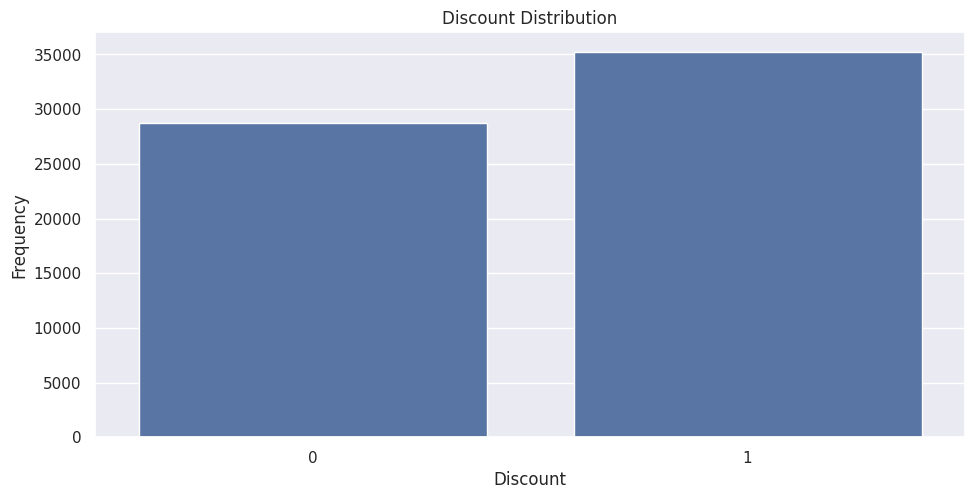

In [12]:
#used_discount
sns.countplot(data = df, x = 'used_discount') # Menggunakan Seaborn untuk membuat count plot
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()

**Tujuan dari Eksplor Numerical Variable Distribution:**


Mengetahui berapa banyak pengguna yang mengunakan diskon (dan tidak), penting untuk: Menilai distribusi pengguna diskon dan menjadi fitur penting dalam prediksi konversi atau uplift ( misal: apakah diskon mendorong orang beli?)

In [13]:
df.used_discount.value_counts()

,count
used_discount,
1,35266
0,28734


In [14]:
df.used_discount.value_counts(normalize=True)

,proportion
used_discount,
1,0.551031
0,0.448969


**Penjelasan:**


df.used_discount: Mengambil kolom used_discount


.value_counts(): Menghitung berapa kali setiap nilai muncul dalam kolom.


.value_counts(normalize=True) : Menentukan persantasenya.

**Tujuan Analisis:**

*    Memahami proporsi pengguna diskon vs tidak

*    Menyadari apakah data imbalanced (tidak seimbang).

*    Menjadi pertimbangan untuk segmentasi atau preprocessing

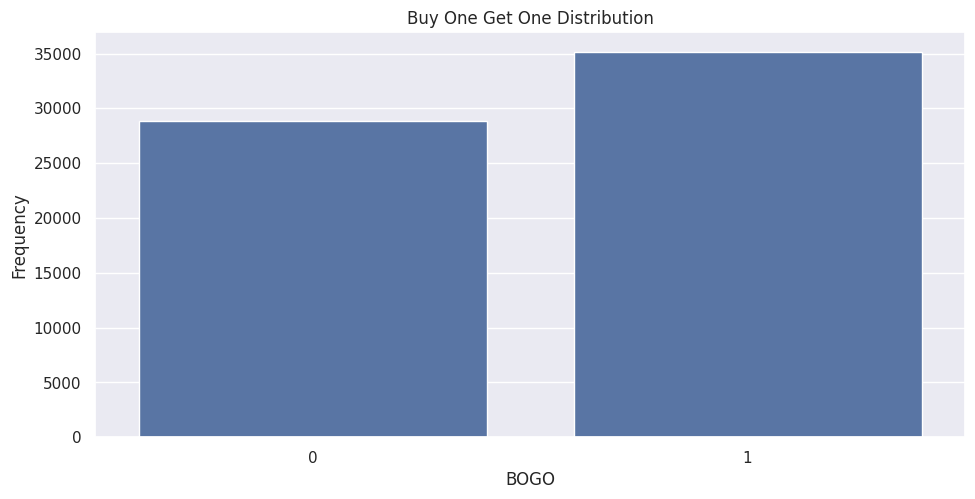

In [15]:
#used_bogo
sns.countplot(data = df, x = 'used_bogo')
plt.title('Buy One Get One Distribution')
plt.xlabel('BOGO')
plt.ylabel('Frequency')
plt.show()

In [16]:
df.used_bogo.value_counts()

,count
used_bogo,
1,35182
0,28818


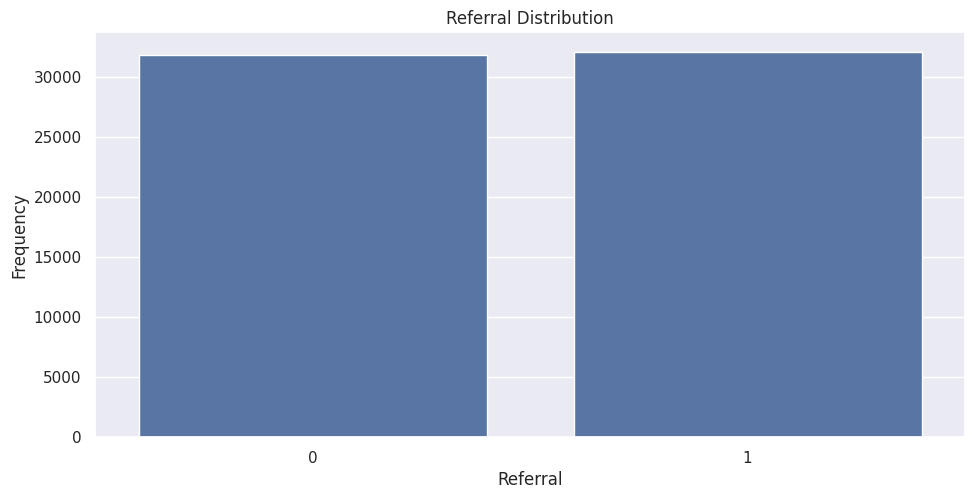

In [17]:
#is_referral
sns.countplot(data = df, x = 'is_referral')
plt.title('Referral Distribution')
plt.xlabel('Referral')
plt.ylabel('Frequency')
plt.show()

In [18]:
df.is_referral.value_counts()

,count
is_referral,
1,32144
0,31856


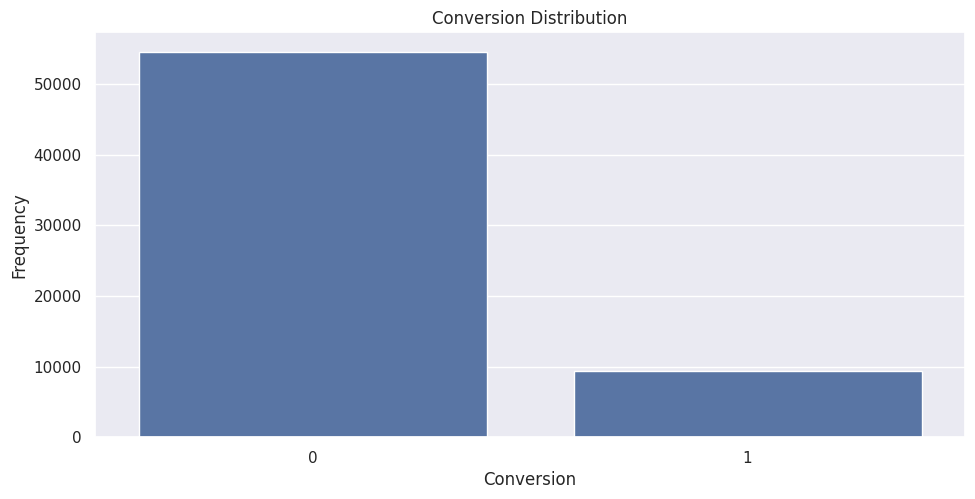

In [19]:
#conversion
sns.countplot(data = df, x = 'conversion')
plt.title('Conversion Distribution')
plt.xlabel('Conversion')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.conversion.value_counts()

,count
conversion,
0,54606
1,9394


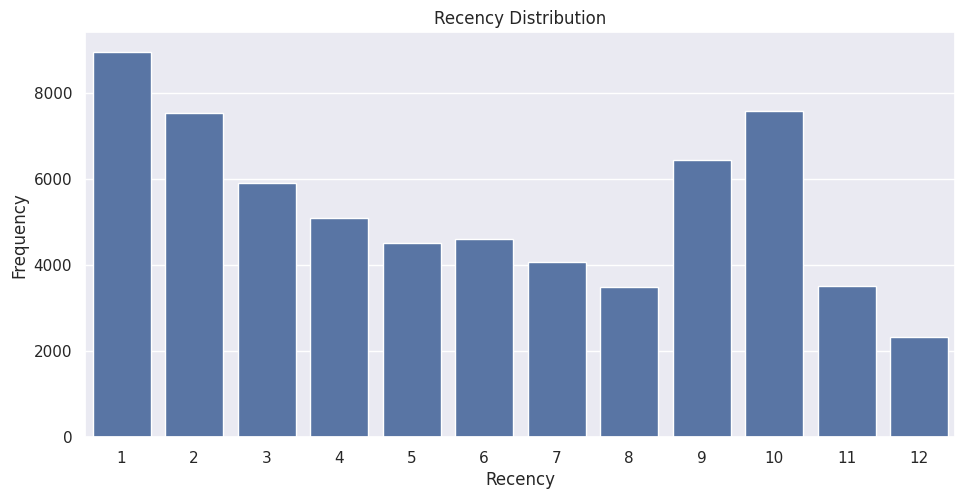

In [21]:
sns.countplot(data = df, x = 'recency')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [22]:
df.recency.value_counts()

,count
recency,
1,8952
10,7565
2,7537
9,6441
3,5904
4,5077
6,4605
5,4510
7,4078


## Categorical Variable Distribution

**Tujuan**

penting untuk memahami:

*    Bagaimana kategori tersebar (apakah imbang atau tidak).

*    Apakah ada outlier kategori (misalnya typo).

*    Siapa yang paling dominan dalam tiap fitur kategori.



**Tujuan Akhir**
*     Mengetahui dominasi atau ketimpangan kategori.

*     Mengenali kategori yang harus dibersihkan atau digabung.

*     Memudahkan proses encoding nanti saat preprocessing.

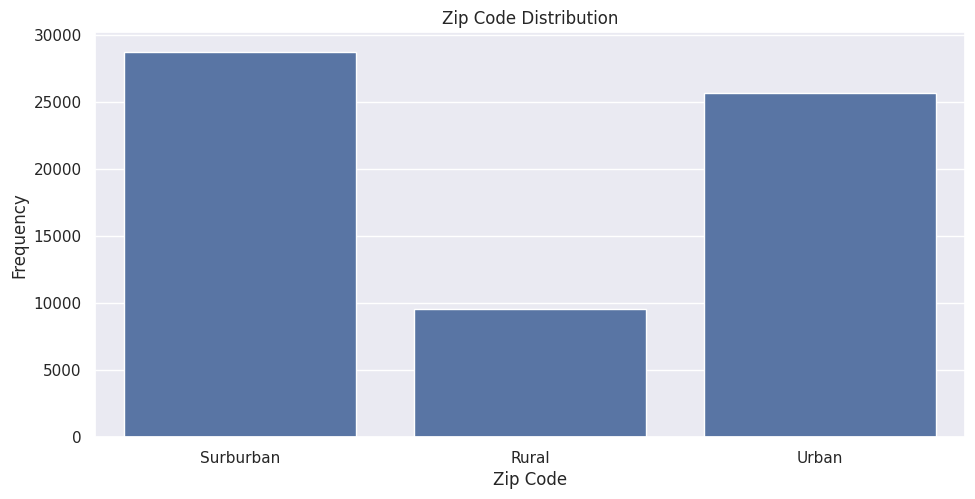

In [23]:
#zip_code
sns.countplot(data = df, x = 'zip_code')
plt.title('Zip Code Distribution')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.show()

In [24]:
df.zip_code.value_counts()

,count
zip_code,
Surburban,28776
Urban,25661
Rural,9563


In [25]:
df.zip_code.value_counts(normalize=True)

,proportion
zip_code,
Surburban,0.449625
Urban,0.400953
Rural,0.149422


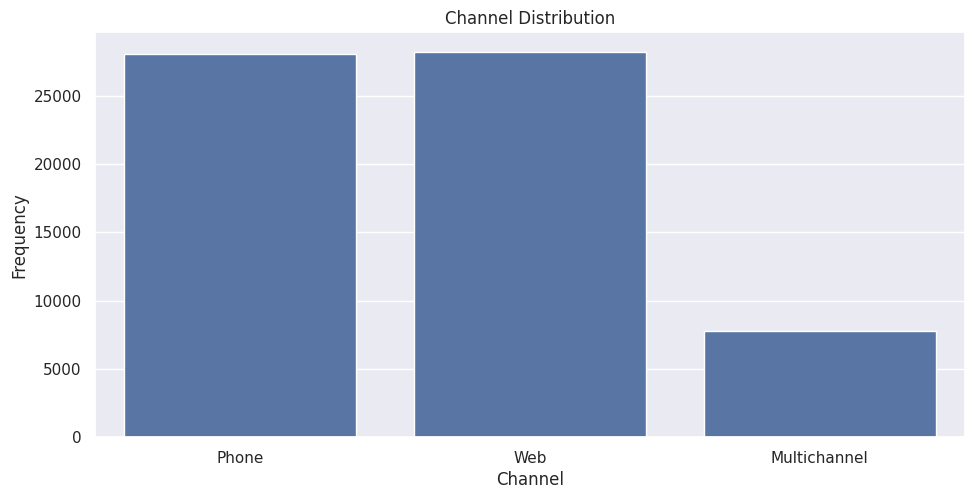

In [26]:
#chanel
sns.countplot(data = df, x = 'channel')
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Frequency')
plt.show()

In [27]:
df.channel.value_counts()

,count
channel,
Web,28217
Phone,28021
Multichannel,7762


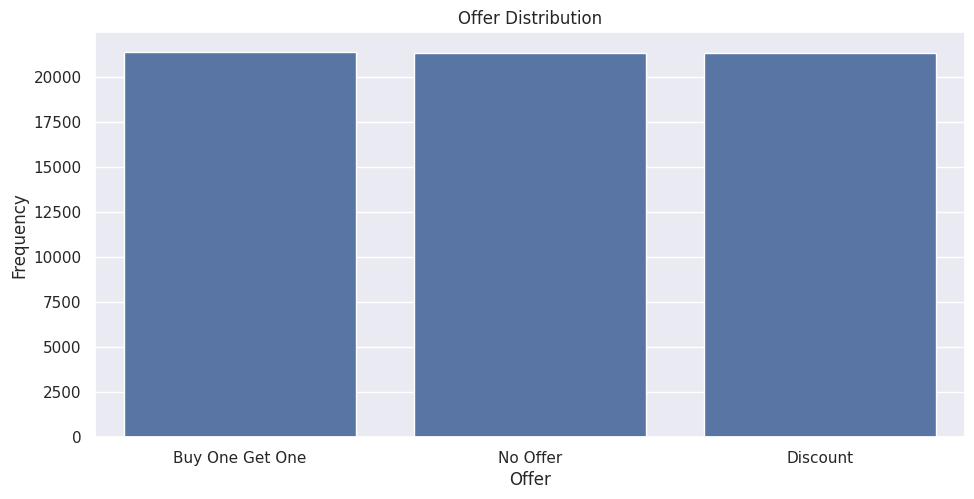

In [28]:
sns.countplot(data = df, x = 'offer');
plt.title('Offer Distribution')
plt.xlabel('Offer')
plt.ylabel('Frequency')
plt.show()

In [29]:
df.offer.value_counts()

,count
offer,
Buy One Get One,21387
Discount,21307
No Offer,21306


## Conversion Rate

**Penjelasan**

Conversion Rate (tingkat konversi), terutama penting di proyek seperti uplift modelling atau marketing campaign, di mana kamu ingin tahu:

Conversion Rate (tingkat konversi) adalah persentase orang yang melakukan aksi yang kamu harapkan.
Biasanya di marketing, contohnya:

Dikirim promo → yang akhirnya beli → itu disebut converted.

“*Berapa banyak orang yang benar-benar melakukan aksi yang diinginkan (misalnya beli, daftar, klik)?*”

**Rumus Conversion Rate**


conversion_rate = jumlah_yang_converted / total_jumlah_orang


**Per Group (Control VS Treatment)**


*Kalau Kamu Ingin Tahu Efek Perlakuan (Treatment):* df.groupby('group')['converted'].mean()

**Misal:**

control     0.33

treatment   0.50

Artinya:

Dari grup control, *33% melakukan konversi.*

Dari grup treatment, *50% melakukan konversi → lebih tinggi → berarti treatment mungkin efektif.*

Karena conversion biasanya 1 (jika berhasil konversi) atau 0 (jika tidak), maka rata-ratanya = conversion rate.

**Kenapa Ini Penting?**


Karena uplift modelling ingin tahu perbedaan konversi antar grup.
Misalnya: “Apakah email promo berhasil bikin orang beli lebih banyak daripada yang tidak dikirimi email?”

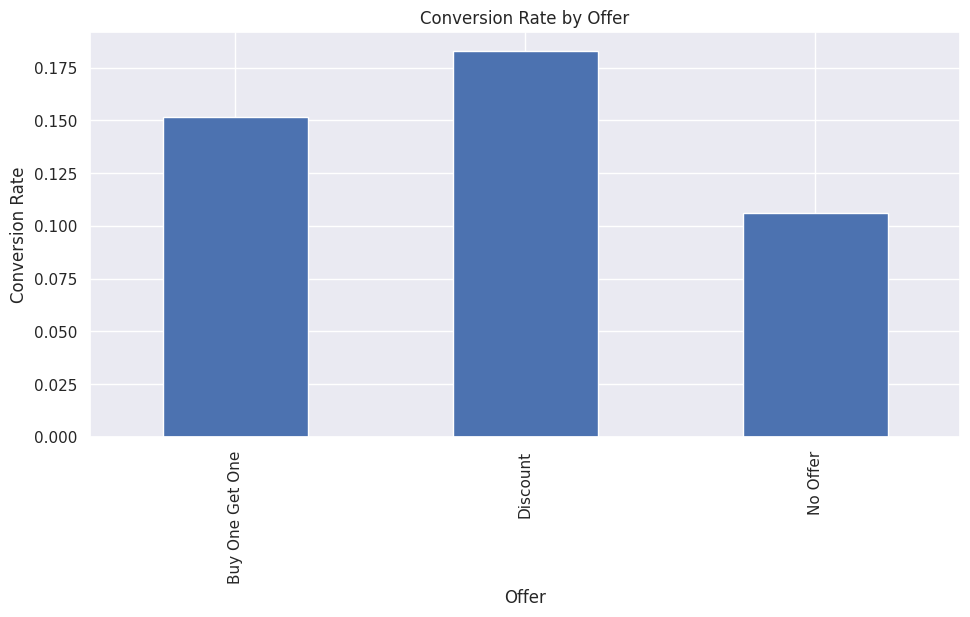

In [30]:
# Kode untuk menghitung dan memvisualisasikan Conversion Rate berdasarkan jenis offer
conversion_rate_offer = df.groupby('offer')['conversion'].mean()

# df.gorupby:  Memisahkan data berdasarkan nilai unik di kolomm offer
# ['conversion'].mean(): Menghitung rata-rata nilai kolom conversion dalam tiap grup

conversion_rate_offer.plot(kind='bar') # Membuat grafik batang (bar plot) dari hasil conversion_rate_offer.
plt.title('Conversion Rate by Offer')
plt.xlabel('Offer')
plt.ylabel('Conversion Rate')
plt.show()

**Penjelasan**
Dari grafik diatas:

Insight dari grafik:


*   Penawaran Discount memiliki conversion rate tertinggi (sekitar 18%). *dari semua orang yang dapat diskon, 18% melakukan pembelian*

*   Buy One Get One berada di posisi kedua dengan conversion rate (sekitar 15%).

*   No Offer menunjukkan conversion rate terendah, (sekitar 10%).


Penawaran diskon paling efektif dalam mendorong konversi, diikuti oleh program beli satu gratis satu

In [ ]:
conversion_rate_offer

,conversion
offer,
Buy One Get One,0.151400
Discount,0.182757
No Offer,0.106167


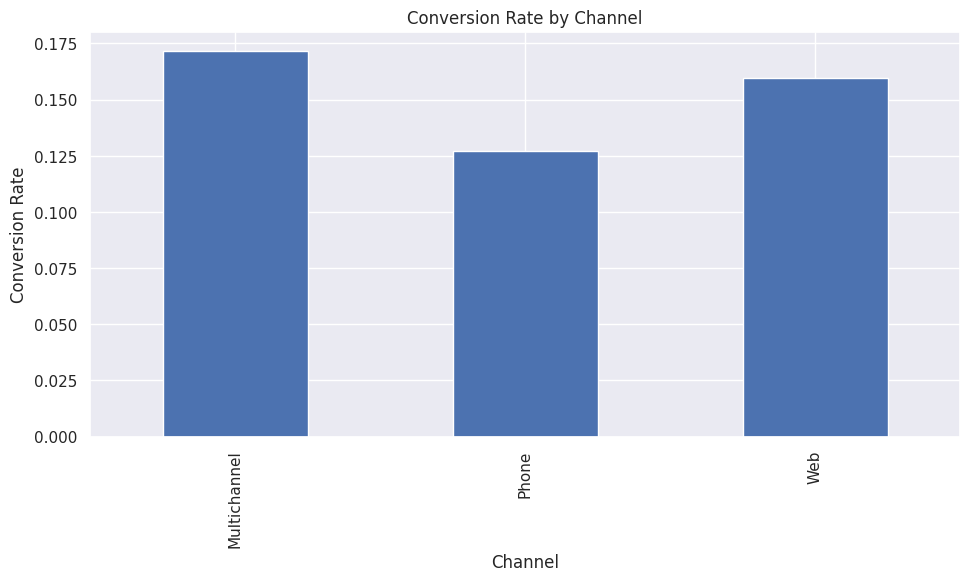

In [ ]:
conversion_rate_channel = df.groupby('channel')['conversion'].mean()
conversion_rate_channel.plot(kind='bar')
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.show()

In [ ]:
conversion_rate_channel

,conversion
channel,
Multichannel,0.171734
Phone,0.127155
Web,0.159407


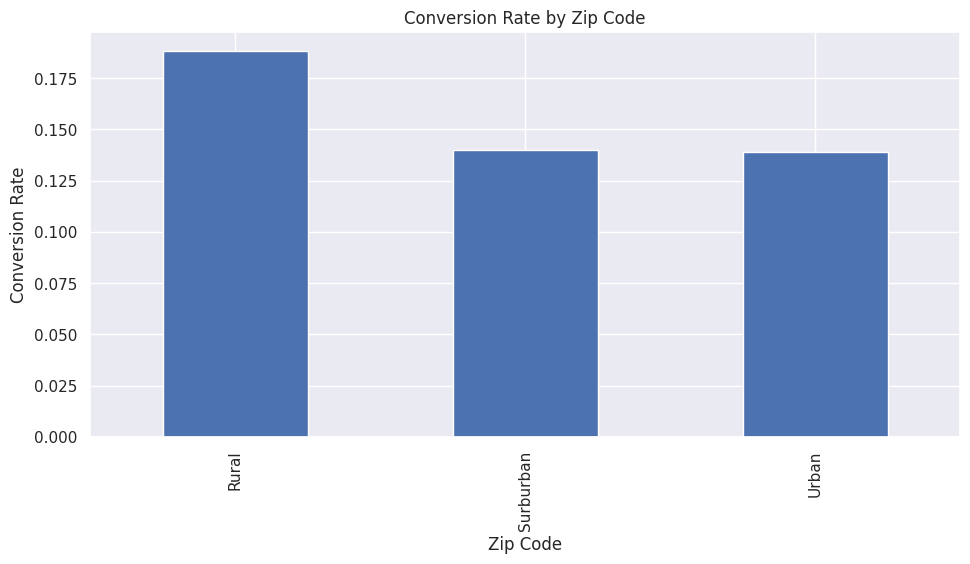

In [ ]:
conversion_rate_zip = df.groupby('zip_code')['conversion'].mean()
conversion_rate_zip.plot(kind='bar')
plt.title('Conversion Rate by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Conversion Rate')
plt.show()

# Data Preprocessing to Modeling

In [ ]:
# treatment variable
treatment_variable = "offer"    # Menyatakan bahwa kolom offer adalah variabel perlakuan (treatment).
                                # Contohnya: jenis promo seperti "Discount", "Buy One Get One", dll.

# target variable
target_variable = "conversion"  # Menyatakan bahwa kolom conversion adalah target atau label.
                                # Nilainya biasanya 1 (berhasil konversi) atau 0 (tidak konversi).

# control category
control_category = "Buy One Get One" # Ini adalah kategori dalam offer yang dianggap grup kontrol.
                                     # Artinya: kamu akan membandingkan efek Discount terhadap grup ini.

# treatment category
treatment_category = "Discount"      # Ini kategori dalam offer yang menjadi perlakuan utama dalam analisis uplift.
                                     # Tujuannya: melihat apakah orang yang dapat Discount lebih banyak yang konversi dibanding Buy One Get One.


# category to exclude if needed
exclusion_category = "No Offer" # Kategori No Offer tidak akan dianalisis karena orang ini tidak menerima promo apa pun.
                                # Ini biasanya dibuang saat membuat model uplift karena tidak relevan (tidak dapat treatment maupun control).


# column to encode
categorical_columns = ["zip_code", "channel"]  # Kolom-kolom ini bertipe kategorikal dan perlu diubah (encode) jadi angka sebelum masuk ke model.

Kenapa Ini Penting?
Karena uplift modelling fokus pada:

*“Perbedaan efek treatment terhadap target (konversi) antara grup kontrol dan grup perlakuan.”*

Jadi kita harus tahu persis:

*   Mana kolom treatment,

*   Mana kontrol & perlakuannya,

*   Mana yang mau dianalisis,

*   Dan mana variabel yang harus dikodekan biar bisa diproses model.

jadi, kenapa BOGO merupakan control category? karema kita ingin apakah diskon mempengaruhi treatment biasa atau tidak.

## Remove Exclude Category

Disini kita menghapus Exclude Category karena tidak digunakan untuk uplift modelling

In [ ]:
# Preprocessing
if exclusion_category != None:
  df = df.loc[df[treatment_variable] != exclusion_category].reset_index(drop=True)

**Penjelasan:**
*   Codingan tersebut mengecek kategori yang akan dikeluarkan apakah ada kolomnya atau tidak
*   setelah ada, akan dibuat pembaruan terhadap dataframe, dengan df= df.loc[df[treatment_variable]!=exclusion_category] ialah memilih semua baris yang nilai kolom offer-nya bukan "No Offer"
*    .reset_index(drop=True) ialah agar df itu rapih kembali, misal baris 1 terhapus, maka baris 2 naik ke 1 dst.
*     drop=true agar tidak ada kolom baru



In [ ]:
n_treatment = df[treatment_variable].nunique()

**Penjelasan**

Menghitung jumlah kategori unik di kolom offer setelah penghapusan.

In [ ]:
n_treatment #harusnya sesuai dengan penamaan variabel sebelumnya

2

**Penjelasan**

Nilai n_treatment menunjukkan jumlah perlakuan yang masih tersedia dalam dataset (termasuk kontrol). Idealnya, untuk uplift model yang simpel:

2 kategori:

Satu dianggap treatment (misalnya "Discount")

Satu lagi control ("Buy One Get One")

In [ ]:
sns.countplot(data = df, x = treatment_variable); #sns.countplot() digunakan untuk membuat plot batang (bar plot) yang menampilkan jumlah kemunculan nilai-nilai unik
plt.title('Offer Distribution')
plt.xlabel('Offer')
plt.ylabel('Frequency')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
df.offer.value_counts()

,count
offer,
Buy One Get One,21387
Discount,21307


## Data Spliting

In [ ]:
# Train-Test Split Data
X_train, X_test = train_test_split(
    df,
    test_size = 0.5, # Membagi data dengan 50% untuk data uji dan 50% untuk data latih
    random_state = 1000 # Menentukan nilai acak agar hasil split dapat direproduksi
)

**Penjelasan**

train_test_split(df, test_size=0.5, random_state=1000):

*   df: Data yang akan dibagi menjadi data latih dan data uji.

*   test_size=0.5: Menentukan bahwa 50% data akan digunakan untuk data uji (test), sisanya akan digunakan untuk data latih (train).

*   random_state=1000: Digunakan untuk memastikan hasil pembagian data selalu sama setiap kali kode dijalankan, asalkan menggunakan nilai yang sama (dalam hal ini, 1000).

Setelah pembagian, X_train akan berisi data latih dan X_test akan berisi data uji. Kamu bisa melanjutkan ke langkah selanjutnya dalam proses machine learning, seperti pelatihan model dengan X_train dan pengujian model dengan X_test.

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
6242,3,45.97,1,0,Surburban,1,Web,Buy One Get One,0
35476,9,64.77,1,0,Surburban,1,Web,Buy One Get One,0
13464,8,342.60,0,1,Surburban,0,Web,Discount,0
9149,2,860.80,1,1,Urban,1,Web,Discount,0
13145,9,375.54,1,0,Urban,0,Phone,Buy One Get One,0


In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
5359,7,152.98,1,0,Surburban,0,Web,Discount,0
28495,3,167.28,0,1,Urban,0,Web,Discount,0
25688,9,541.32,0,1,Surburban,1,Multichannel,Discount,0
4997,2,243.57,1,1,Urban,0,Multichannel,Discount,0
7299,5,180.99,0,1,Surburban,1,Phone,Discount,0


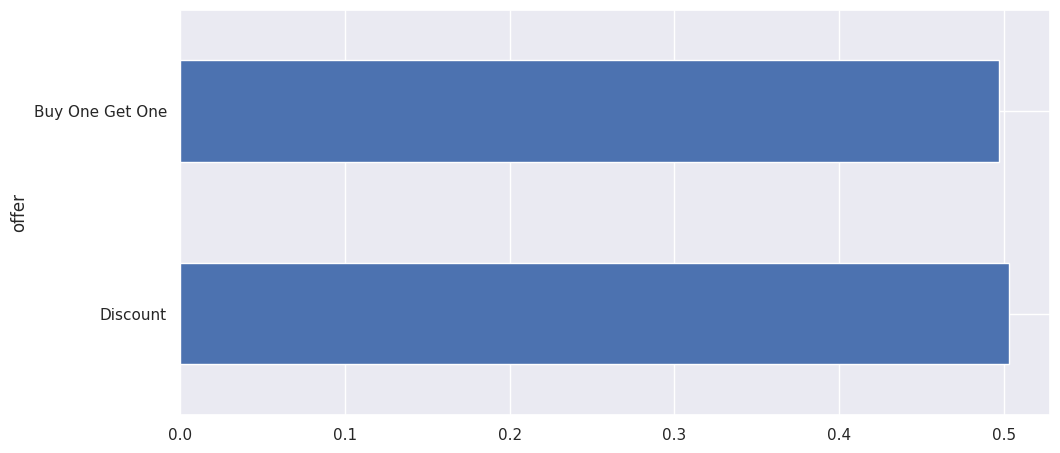

In [ ]:
X_train.offer.value_counts(normalize = True).plot.barh(); #membuat visualisasi distribusi kategori dari kolom offer di dataset X_train dalam bentuk bar horizontal (barh = bar horizontal)

**Penjelasan**

*  X_train.offer: mengambil kolom offer dari data latih X_train
*  .value_counts(normalize=True): Menghitung jumlah masing-masing kategori, sedangkan normalize=True untuk membuatnya dalam bentuk proporsi/persantase

## One-hot Encoding

 One-Hot Encoding sangat berguna ketika kamu ingin menggunakan kolom tersebut dalam model machine learning, karena model tidak bisa langsung membaca data dalam bentuk teks/kategori seperti 'A', 'B', 'C'.

In [ ]:
# Encode categorical variables on X train data
dummies = pd.get_dummies(X_train[categorical_columns])
X_train = pd.concat([X_train.drop(categorical_columns, axis=1), dummies], axis=1)

# Encode categorical variables on X test data
dummies = pd.get_dummies(X_test[categorical_columns])
X_test = pd.concat([X_test.drop(categorical_columns, axis=1), dummies], axis=1)

**Penjelasan**


One-Hot Encoding mengubah setiap kategori menjadi kolom baru yang berisi nilai 0 atau 1:

1 berarti baris tersebut memiliki kategori itu.

0 berarti tidak.

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
6242,3,45.97,1,0,1,Buy One Get One,0,False,True,False,False,False,True
35476,9,64.77,1,0,1,Buy One Get One,0,False,True,False,False,False,True
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
13145,9,375.54,1,0,0,Buy One Get One,0,False,False,True,False,True,False


In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False


## Check Spending History by Experiment Group

mengevaluasi efek dari treatment (perlakuan) — misalnya diskon, penawaran khusus, atau fitur baru — terhadap perilaku pengguna, terutama jumlah uang yang mereka belanjakan.

In [ ]:
is_treat = X_train[X_train.offer != control_category]
not_treat = X_train[X_train.offer == control_category]

In [ ]:
is_treat.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
41013,2,29.99,0,1,0,Discount,0,False,True,False,False,False,True
25025,2,95.29,1,0,1,Discount,0,False,False,True,False,True,False
20670,2,218.05,1,0,0,Discount,0,True,False,False,True,False,False


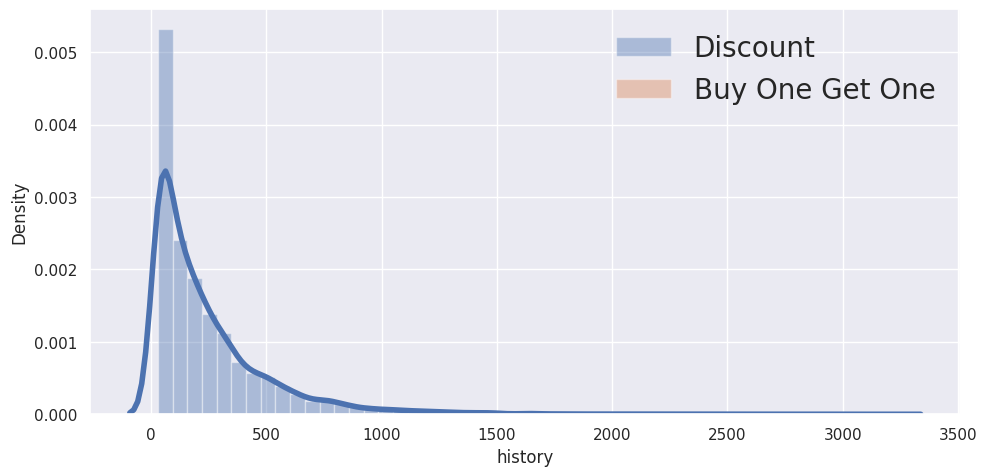

In [ ]:
# bins = 25
sns.distplot(is_treat.query("offer == 'Discount'").history, hist=True, kde=True, kde_kws={'linewidth': 4}, label='Discount')
sns.distplot(is_treat.query("offer == 'Buy One Get One'").history, hist=True, kde=True, kde_kws={'linewidth': 4}, label='Buy One Get One')
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 20});

1. Distribusi sangat miring ke kanan (right-skewed)

*   Sebagian besar pelanggan punya pengeluaran historis yang rendah (di bawah 500), dan hanya sedikit yang sangat tinggi (hingga >3000).

*   Ini wajar untuk data pembelanjaan: kebanyakan orang belanja kecil, hanya sedikit yang belanja besar.

*   Grup "Discount" tampak dominan

2. Hanya kurva biru yang tampak jelas.

*   Kurva oranye muda untuk "Buy One Get One" tidak terlihat atau sangat kecil kontribusinya.



> Ini menunjukkan kemungkinan:


> - Ukuran sample grup "Buy One Get One" jauh lebih kecil, atau
> - Distribusinya sangat mirip dengan "Discount", sehingga kurvanya tertutupi.



3. Distribusi "history" antara kedua grup tampaknya mirip

*  Jika kamu zoom in (atau lihat data summary), kamu bisa konfirmasi apakah kedua grup memiliki rata-rata, median, dan penyebaran serupa.

*  Kalau benar mirip, artinya eksperimen sudah teracak dengan baik (good randomization) → syarat penting untuk model uplift.



**Kesimpulan Awal**

*  Distribusi history terlihat konsisten antar grup treatment.

*  Tidak ada indikasi bias distribusi yang mencolok antar "Discount" dan "Buy One Get One".

In [ ]:
sns.distplot(is_treat.query("offer == 'Buy One Get One'").history, hist=True, kde=True, kde_kws={'linewidth': 4}, label='Buy One Get One')
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 20});

## Check Recency Distribution by Experiment Group

Check Recency Distribution by Experiment Group" adalah langkah lanjutan untuk memastikan bahwa pembagian grup treatment (Discount vs Buy One Get One) juga tidak bias terhadap waktu terakhir pelanggan bertransaksi (recency).



**Tujuan**

*   Validasi randomisasi → Pastikan grup treatment tidak memiliki bias waktu (misal, satu grup isinya pelanggan baru semua).

*    Kenali perilaku pelanggan berdasarkan waktu terakhir mereka berinteraksi/belanja.

*    Memprediksi kemungkinan respon terhadap treatment berdasarkan seberapa "baru" mereka aktif.

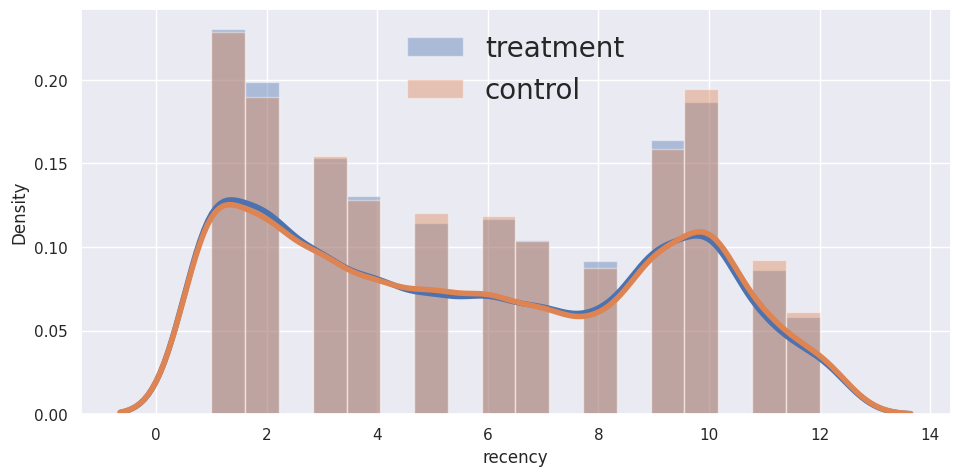

In [ ]:
# bins = 25
sns.distplot(is_treat.recency, hist=True, kde=True, kde_kws={'linewidth': 4}, label='treatment')
sns.distplot(not_treat.recency, hist=True, kde=True, kde_kws={'linewidth': 4}, label='control')
plt.legend(frameon=False, loc=0, ncol=1, prop={'size': 20});

 Interpretasi Grafik:


1.  Grafik menunjukkan distribusi recency (berapa hari sejak terakhir belanja) untuk dua grup:

*   Treatment (dapat promo)

*   Control (tidak dapat promo)

2.  Kedua kurva hampir identik:

*    Bentuk dan tinggi kurva hampir sama di semua nilai recency.

*     Ini artinya tidak ada perbedaan signifikan antara treatment dan control dari segi kapan terakhir mereka belanja.

“*Oke, kita fair. Kalau ada beda hasil antara treatment vs control, kemungkinan besar itu efek dari promosi, bukan karena recency-nya beda*.”

**Kesimpulan:**


Distribusi recency antara treatment dan control hampir sama.

✔️ Ini bagus! Artinya pembagian kelompok eksperimen kamu fair dan tidak bias. Kamu bisa lanjut ke tahap analisis uplift modeling dengan lebih percaya diri.

# Develop Uplift Model

Ini adalah bagian di mana kamu membangun model yang bisa memprediksi siapa yang akan terpengaruh oleh promosi, dan siapa yang tidak perlu dikasih promosi sama sekali.

In [ ]:
X_train.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web
6242,3,45.97,1,0,1,Buy One Get One,0,False,True,False,False,False,True
35476,9,64.77,1,0,1,Buy One Get One,0,False,True,False,False,False,True
13464,8,342.60,0,1,0,Discount,0,False,True,False,False,False,True
9149,2,860.80,1,1,1,Discount,0,False,False,True,False,False,True
13145,9,375.54,1,0,0,Buy One Get One,0,False,False,True,False,True,False


In [ ]:
x_col = X_train.drop([treatment_variable, target_variable], axis = 1).columns.tolist()
print(x_col)

['recency', 'history', 'used_discount', 'used_bogo', 'is_referral', 'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban', 'channel_Multichannel', 'channel_Phone', 'channel_Web']


**Penjelasan:**

*    Kenapa treatment dan target variabel kolom harus dihapus?karena bisa digunakan untuk model.fit dan model.predict. Kalo tidak dibuang, maka model curang belajar dari target dan bias karena belajar dari treatment.

*    Artinya hanya kolom fitur (input) yang boleh dipakai model.

## S-Learner



> Setelah dimiliki x_col (hanya berisi fitur netral, tanpa *treatment* dan *target*), siap masuk ke modeling.




S-Learner (Single Model Learner) adalah salah satu cara sederhana untuk membangun uplift model:
*   Gabungkan semua data (treatment + control)
*   Masukkan kolom treatment sebagai salah satu fitur
*   Latih satu model klasifikasi, misalnya RandomForest, XGBoost, atau LogisticRegression.

nah disini kita menggunakan LGBMClassifier yang merupakan API dari LightGBM dari python yang simpel untuk mengklasifikasikan.

jadi ngga perlu pake randomforest dkk, ini lebih simpel dan banyak yang pakai.



Tujuannya:

Model akan belajar “kalau dikasih treatment, lebih mungkin beli atau enggak?”



> **Define S-Learner (Classifier) using LGBMClassifier as base model**



In [ ]:
slearner = BaseSClassifier(LGBMClassifier(), control_name=control_category)

**Penjelasan:**

*  Menggabungkan LGBMClassifier ke dalam struktur uplift model (S-Learner).

*  Model ini nanti akan belajar membedakan pengaruh treatment terhadap target berdasarkan fitur-fitur pelanggan.



Kode diatas bertujuan membuat model uplift berbasis S-Learner atau bisa disebut juga membuat objek S-Learner.

Atau disebut juga, membuat objek S-Learner menggunakan LGBMClassifier sebagai model dasar (base model) untuk memprediksi uplift atau efek kausal dari treatment.

| Komponen                        | Penjelasan                                                                                         |
| ------------------------------- | -------------------------------------------------------------------------------------------------- |
| `BaseSClassifier()`             | Kelas (class) dari library uplift modeling untuk membuat **S-Learner**.                            |
| `LGBMClassifier()`              | Model pembelajaran mesin berbasis pohon (LightGBM), digunakan untuk klasifikasi.                   |
| `control_name=control_category` | Menentukan label/kategori dari **grup kontrol** (biasanya `"control"` atau angka `0`).             |
| `slearner = ...`                | Menyimpan hasil objek S-Learner ke variabel `slearner` agar bisa digunakan untuk training/predict. |




> **Estimate Average Treatment Effect**



ATE = Average Treatment Effect
→ Ini adalah angka rata-rata perubahan probabilitas hasil (misalnya: pembelian) jika seseorang diberi treatment dibandingkan tidak diberi treatment.

In [ ]:
slearner.estimate_ate(X_train[x_col].values, X_train[treatment_variable].values, X_train[target_variable].values, bootstrap_ci  = True)

[LightGBM] [Info] Number of positive: 3554, number of negative: 17793
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 21347, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166487 -> initscore=-1.610731
[LightGBM] [Info] Start training from score -1.610731


array([0.03145511])



**Penjelasan**

Baris kode ini memanggil metode estimate_ate pada objek S-Learner-mu untuk mengukur Average Treatment Effect (ATE), yaitu efek rata-rata dari treatment (promo) terhadap probabilitas beli."


Output: 0.0314

Jika semua pelanggan diberikan treatment, maka rata-rata kemungkinan mereka membeli akan naik sekitar 3.14% dibandingkan jika tidak diberi treatment.



>   Predict CATE for Each Treatment

Memprediksi uplift per individu dalam data uji (CATE - Conditional Average Treatment Effect) menggunakan model S-Learner yang sudah kamu buat dan latih sebelumnya.

**Analoginya:**


"Kalau aku kasih promo ke orang ini, kemungkinan besar dia bakal lebih tertarik beli atau malah nggak ngaruh?"

In [ ]:
slearner_tau = slearner.predict(X_test[x_col].values, X_test[treatment_variable].values, X_test[target_variable].values)

**Penjelasan**

 S-Learner.predict artinya menggunakan model S-Learner yang sudah dilatih sebelumnya untuk memprediksi uplift score dari data uji (test set).

 Di S-Learner, fungsi .predict() digunakan untuk menghitung CATE


| Parameter                           | Penjelasan                                                               |
| ----------------------------------- | ------------------------------------------------------------------------ |
| `X_test[x_col].values`              | Data fitur pelanggan (tanpa treatment & target). Contohnya: umur, income |
| `X_test[treatment_variable].values` | Apakah pelanggan menerima treatment/promo (0 = tidak, 1 = iya)           |
| `X_test[target_variable].values`    | Apakah pelanggan melakukan pembelian (0 atau 1).                         |


**Secara Konsep,**

.predict() di sini melakukan:
1.   Mengambil data fitur X_test[x_col]

2.   Menggabungkannya dengan data treatment (apakah orang ini mendapat promo atau tidak)

3.   Menggunakan model klasifikasi tunggal (misalnya LGBMClassifier) untuk:

*    Memprediksi probabilitas beli jika treatment = 1

*    Memprediksi probabilitas beli jika treatment = 0

4.   Menghitung:

uplift
=
𝑃
(
beli
∣
treatment
=
1
)
−
𝑃
(
beli
∣
treatment
=
0
) Untuk setiap individunya

In [ ]:
slearner_tau


array([[ 0.02416307],
       [ 0.03136489],
       [ 0.02432166],
       ...,
       [ 0.00901794],
       [-0.00460468],
       [ 0.00063413]])

**Penjelasan**

*   Angka positif = treatment kemungkinan meningkatkan pembelian orang ini

*   Angka negatif = treatment kemungkinan menurunkan pembelian

*   Angka mendekati nol = treatment kemungkinan tidak berdampak signifikan

Tiap nilai menunjukkan prediksi uplift individu.



> **Insert result to dataframe**



In [ ]:
X_test['s_learner_tau'] = slearner_tau


**Penjelasan**

berarti kamu sedang memasukkan hasil prediksi uplift (dari model S-Learner) ke dalam data uji (X_test) sebagai kolom baru bernama 's_learner_tau'.

**Sederhananya:**
Kamu sekarang punya prediksi efek treatment per orang dalam dataset-mu.
Nilai s_learner_tau itu yang akan kamu pakai untuk tahu:
"Siapa yang benar-benar bermanfaat diberi promo, dan siapa yang tidak usah."



> **Check uplift distribution**



 untuk tahu seberapa baik model awal memisahkan treatment effec

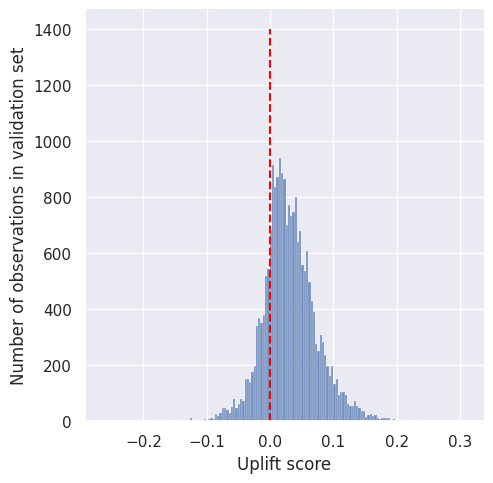

In [ ]:
sns.displot(data = X_test['s_learner_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red") # Menambahkan garis vertikal merah di titik 0
# Sebelah kanan garis (positif) ialah orang yang berpotensi untung diberi promo
# Sebelah kiri garis (negatif) ialah sebaiknya tidak diberi promo

plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');

**Penjelasan:**

**Interpretasi Visual:**

*  Mayoritas uplift score berada di sekitar 0, dengan puncak kecil di antara 0 hingga 0.05.

*  Distribusi simetris seperti bentuk lonceng (normal), sedikit condong ke arah positif.

*  Hanya sedikit pelanggan yang memiliki uplift score sangat tinggi (> 0.2) atau sangat rendah (< -0.1).

**Artinya**
1.  Kebanyakan pelanggan tidak terlalu terpengaruh oleh treatment (promo).

*   Karena nilai uplift-nya kecil (dekat nol).

*   Treatment hanya berdampak kecil atau netral bagi sebagian besar orang.

2.   Ada subset kecil pelanggan dengan uplift positif signifikan:

*    Mereka ini target utama kamu.

*    Mereka akan lebih mungkin membeli jika diberi treatment.

3.   Ada juga yang uplift-nya negatif:

*    Artinya treatment malah mengurangi kemungkinan beli.

*    Harus dihindari — jangan berikan promo ke mereka.





**Strategi Bisnis:**

*  Kamu bisa pakai threshold targeting berdasarkan grafik ini:

*Misalnya, hanya beri promo ke pelanggan dengan uplift score > 0.05.*

*Atau lebih ketat lagi, misalnya > 0.1, untuk meminimalkan pemborosan.*

*   Ini akan membantu kamu mengoptimalkan budget promosi:

*Fokus hanya ke pelanggan yang benar-benar terpengaruh positif.*

*Hindari memberikan promo ke pelanggan yang tidak terpengaruh atau malah rugi.*


Terlihat Distribusinya masih simetris di sekitar 0, puncaknya di sekitar 0.02-0.03, dan nilai - nilai positif juga tidak terlalu besar (maksimal 0.25-0.3) maka secara umum model masih cukup "hati-hati" atau "ragu-ragu"

| Ciri Distribusi                         | Arti                                                              |
| --------------------------------------- | ----------------------------------------------------------------- |
| Banyak uplift score **dekat nol**       | Model belum yakin treatment memberi pengaruh besar                |
| Tidak banyak uplift **negatif ekstrim** | Model tidak banyak menebak bahwa treatment justru berdampak buruk |
| Tidak banyak uplift **positif ekstrim** | Model belum menemukan segmen yang sangat merespons treatment      |
| Bentuk **mirip normal/simetris**        | Model netral, tidak bias terlalu optimis/pesimis                  |


Maka selanjutnya akan coba dibandingkan dengan Uplift Random Forest (Lebih eksplisit memodelkan dan control)


---



Visualisasi ini membantumu:

*   Memahami distribusi efek treatment di populasi pelanggan.

*   Menentukan strategi targeting:
Fokus ke pelanggan dengan uplift score positif tertinggi.

*   Menilai model:
Kalau distribusinya banyak di sisi positif → treatment efektif.



**Insight**


Cek distribusi uplift itu seperti “melihat isi kepala” dari model kamu:

*  Apakah dia yakin pada siapa yang akan berubah perilakunya jika diberi treatment?

*  Apakah masih terlalu ragu-ragu (skor terlalu banyak di sekitar 0)?


## Uplift-Tree (Uplift Random Forest)

langkah awal untuk membangun model Uplift Tree, yaitu Uplift Random Forest Classifier



> Define uplift random forest classifier



In [ ]:
uplift_model = UpliftRandomForestClassifier(control_name=control_category, random_state=1000)

**Penjelasan**
1. UpliftRandomForestClassifier
Ini adalah kelas model machine learning khusus untuk uplift modeling, mirip Random Forest biasa tapi:

*   Dirancang untuk membedakan efek treatment vs control

*   Fokusnya bukan memprediksi outcome, tapi perbedaan akibat treatment

**Model ini akan:**

*   Membangun beberapa pohon keputusan

*   Setiap pohon dipecah berdasarkan perbedaan uplift, bukan hanya impurity biasa

*   Akhirnya memberi skor CATE (Conditional Average Treatment Effect) atau uplift score untuk tiap observasi

| Aspek        | S-Learner               | Uplift Tree (Uplift RF)                       |
| ------------ | ----------------------- | --------------------------------------------- |
| Algoritma    | Satu model gabungan     | Dua cabang per pohon (untuk treat vs control) |
| Fokus Split  | Optimasi prediksi label | Optimasi perbedaan efek treatment             |
| Skor         | PREDIKSI efek treatment | CATE langsung                                 |
| Interpretasi | Sulit dibaca            | Lebih interpretatif                           |




> Fit model to data



 tahap pelatihan (fit) model Uplift Random Forest

In [ ]:
uplift_model.fit(      # ini fungsi untuk melatih uplift model
    X_train[x_col].values, # x_col merupakan matriks fitur yang tidak termasuk treatment dan target, juga .values dipakai agar berbentuk ARRAY NumpY, bukan dataframe
    treatment = X_train[treatment_variable].values,  # Ini adalah fitur utama untuk membedakan dua grup (treatment vs control)
    y = X_train[target_variable].values  # Model akan belajar efek treatment terhadap outcome
)

**Penjelasan**

Melatih model UpliftRandomForestClassifier untuk mengenali perbedaan pengaruh treatment vs control terhadap kemungkinan membeli (target).

*Apa yang dilakukan Model?*


Saat .fit() dijalankan, UpliftRandomForestClassifier akan:

1.  Membagi data berdasarkan split yang memaksimalkan uplift (bukan sekadar akurasi).

2.  Buat pohon keputusan berbeda untuk treatment dan control.

3.  Latih model secara ensemble seperti Random Forest biasa, tapi dengan tujuan uplift.

Model ini belajar hubungan antara fitur pelanggan + treatment dan bagaimana itu mempengaruhi outcome (target) secara berbeda di dua grup.



> Do prediction with trained model



In [ ]:
y_pred = uplift_model.predict(X_test[x_col].values, full_output=True)

Check the first 5 rows

In [ ]:
y_pred.head()

,Buy One Get One,Discount,recommended_treatment,delta_Discount,max_delta
0,0.117493,0.186378,1,0.068885,0.068885
1,0.176660,0.202104,1,0.025444,0.025444
2,0.186215,0.172096,0,-0.014118,-0.014118
3,0.169564,0.221276,1,0.051712,0.051712
4,0.170533,0.178704,1,0.008171,0.008171


In [ ]:
X_test['uplift_forest_tau'] = uplift_model.predict(X_test[x_col].values, full_output=False)

In [ ]:
X_test.head()

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,s_learner_tau,uplift_forest_tau
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True,0.024163,0.068885
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True,0.031365,0.025444
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False,0.024322,-0.014118
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False,0.036934,0.051712
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False,-0.019032,0.008171


check uplift distribution

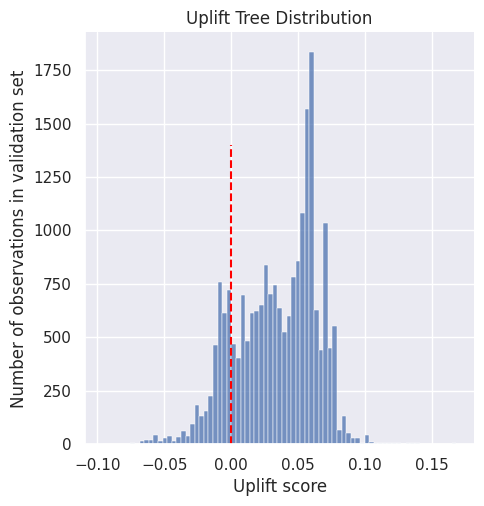

In [ ]:
sns.displot(data = X_test['uplift_forest_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red")
plt.title('Uplift Tree Distribution')
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');

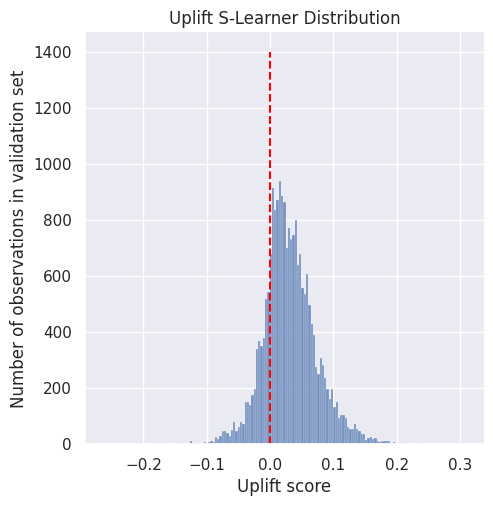

In [ ]:
sns.displot(data = X_test['s_learner_tau'])
plt.vlines([0], 0, 1400, linestyles = "dashed", colors = "red")
plt.title('Uplift S-Learner Distribution')
plt.xlabel('Uplift score')
plt.ylabel('Number of observations in validation set');


## Model Evaluation

In [ ]:
def auuc_metric_maker(dataframe, tau_outcome_var, control_category, treatment_category):

  treatment_category_result = X_test[[tau_outcome_var]].reset_index(drop=True)
  treatment_category_result.columns = [treatment_category]

  # If all deltas are negative, assing to control; otherwise assign to the treatment
  # with the highest delta
  best_treatment = np.where(
      (treatment_category_result < 0).all(axis=1),
      control_category,
      treatment_category_result.idxmax(axis=1)
  )
  # Create indicator variables for whether a unit happened to have the
  # recommended treatment or was in the control group
  actual_is_best = np.where(dataframe[treatment_variable] == best_treatment, 1, 0)
  actual_is_control = np.where(dataframe[treatment_variable] == control_category, 1, 0)

  synthetic = (actual_is_best == 1) | (actual_is_control == 1)
  synth = treatment_category_result[synthetic]

  auuc_score = (synth.assign(
      is_treated = 1 - actual_is_control[synthetic],
      conversion = dataframe.loc[synthetic, target_variable].values,
      model_result = synth.max(axis=1)
  ).drop(columns=list([treatment_category]))).rename(columns = {"model_result": tau_outcome_var})

  return auuc_score

## S-Learner Evaluation

In [ ]:
slearner_auuc_score = auuc_metric_maker(X_test, tau_outcome_var = "s_learner_tau", control_category = control_category, treatment_category = treatment_category)

In [ ]:
slearner_auuc_score.head()

,is_treated,conversion,s_learner_tau
0,1,0,0.024163
1,1,0,0.031365
2,1,0,0.024322
3,1,0,0.036934
5,0,0,0.058595


In [ ]:
print(slearner_auuc_score.columns)

Index(['is_treated', 'conversion', 's_learner_tau'], dtype='object')


Calculate treated group based who conversion our platform, treated or not

In [ ]:
slearner_auuc_score.groupby('is_treated').sum()[[target_variable]]

,conversion
is_treated,
0,1653
1,1569


Uplift Forest Evaluation

In [ ]:
uplift_forest_auuc_score = auuc_metric_maker(X_test, tau_outcome_var = "uplift_forest_tau", control_category = control_category, treatment_category = treatment_category)

In [ ]:
uplift_forest_auuc_score.head()

,is_treated,conversion,uplift_forest_tau
0,1,0,0.068885
1,1,0,0.025444
3,1,0,0.051712
4,1,0,0.008171
5,0,0,0.054569


Cumulative Gain Plot

**S-Learner Model**

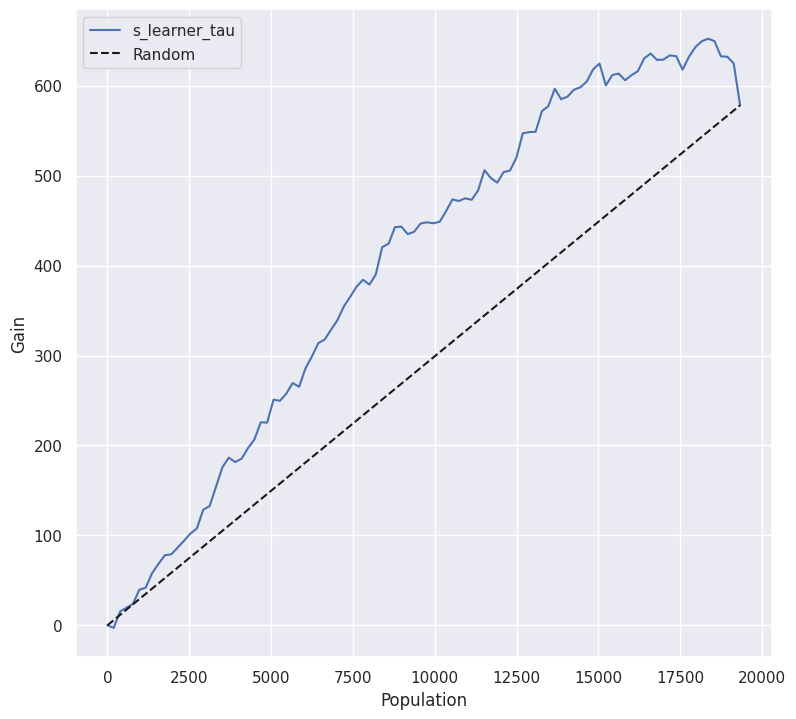

In [ ]:
metrics.plot_gain(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

**Uplift Forest Model**

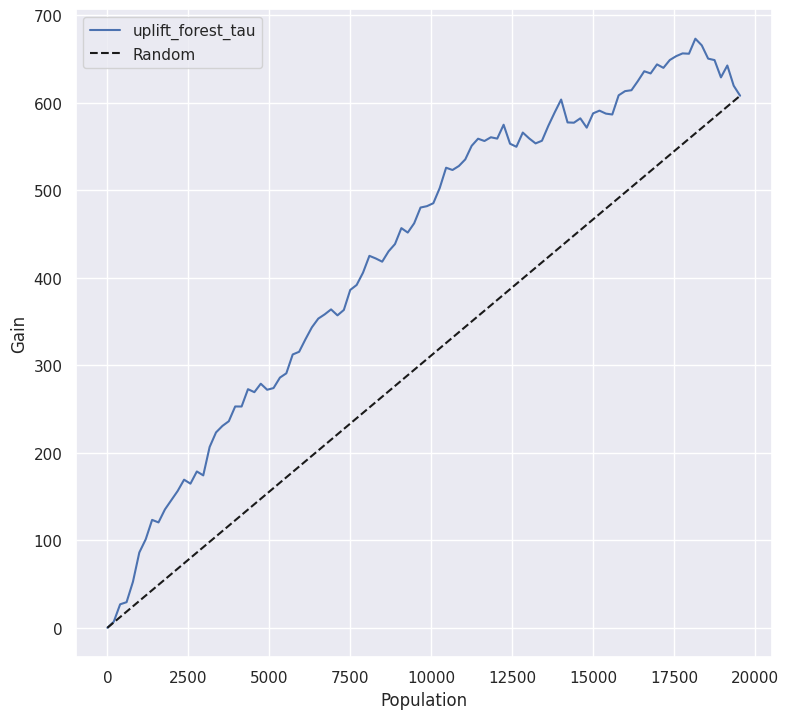

In [ ]:
metrics.plot_gain(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

## AUUC and Qini Score

**AUUC for S-Learner**

In [ ]:
metrics.auuc_score(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

,0
s_learner_tau,0.691307


**AUUC for Uplift Forest**

In [ ]:
metrics.auuc_score(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

,0
uplift_forest_tau,0.705754


**Qini Score for S-Learner**

In [ ]:
metrics.qini_score(slearner_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

,0
s_learner_tau,0.268013


**Qini Score for Uplift Forest**

In [ ]:
metrics.qini_score(uplift_forest_auuc_score, outcome_col=target_variable, treatment_col='is_treated')

,0
uplift_forest_tau,0.27616


## Quantile Metrics

If the model is working well, we should see a larger positive difference in the highest decile, decreasing to a small or negative difference in the lowest decile (i.e. treatment rate similar to control rate, or lower than control rate). In other words, as predicted uplift increases, the true uplift from control to treatment group should increase as well.

**Create new dataframe object**

In [ ]:
X_test

,recency,history,used_discount,used_bogo,is_referral,offer,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,s_learner_tau,uplift_forest_tau
5359,7,152.98,1,0,0,Discount,0,False,True,False,False,False,True,0.024163,0.068885
28495,3,167.28,0,1,0,Discount,0,False,False,True,False,False,True,0.031365,0.025444
25688,9,541.32,0,1,1,Discount,0,False,True,False,True,False,False,0.024322,-0.014118
4997,2,243.57,1,1,0,Discount,0,False,False,True,True,False,False,0.036934,0.051712
7299,5,180.99,0,1,1,Discount,0,False,True,False,False,True,False,-0.019032,0.008171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,9,29.99,1,0,1,Buy One Get One,0,True,False,False,False,True,False,0.041345,0.047643
4628,5,83.67,1,0,0,Buy One Get One,0,False,True,False,False,False,True,0.054705,0.068885
35577,11,75.44,0,1,1,Discount,0,False,True,False,False,False,True,0.009018,0.019820
14877,3,831.76,1,0,1,Discount,0,False,True,False,False,False,True,-0.004605,0.009101


In [ ]:
def quantile_and_treatment(dataframe, tau_outcome_var, treatment_variable, control_category, treatment_category):
  # Bin uplift score by using quantile
  score_quantiles, score_quantile_bins = pd.qcut(
    x = dataframe[tau_outcome_var],
    q = 10,
    retbins = True,
    duplicates = 'drop'
  )
  dataframe['Quantile bin'] = score_quantiles
  # Calculate number of samples for each bins
  count_by_quantile_and_treatment = dataframe.groupby(['Quantile bin', treatment_variable])[treatment_variable].count().unstack(-1)
  return count_by_quantile_and_treatment[[control_category, treatment_category]]

In [ ]:
final_result = quantile_and_treatment(X_test, tau_outcome_var = "uplift_forest_tau", treatment_variable = treatment_variable, control_category = control_category, treatment_category = treatment_category)

***Visualize the impact of the treatment***

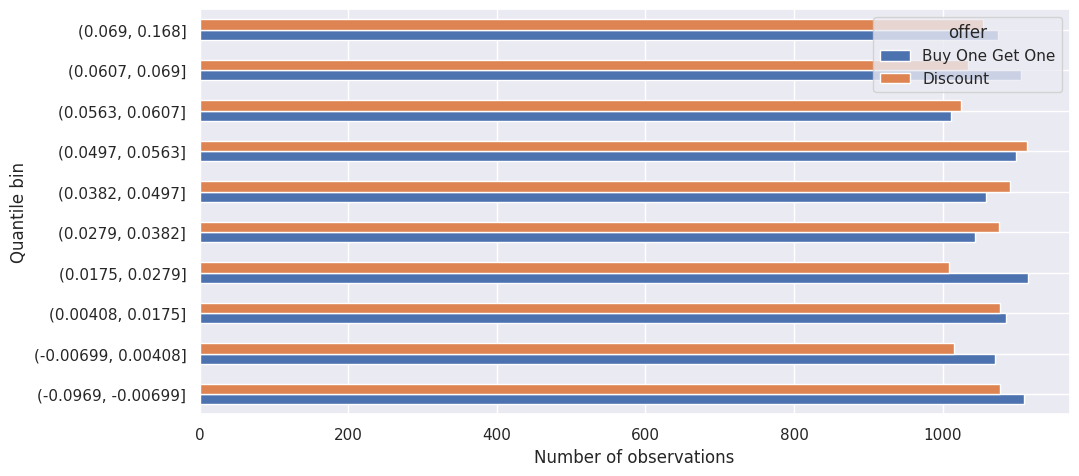

In [ ]:
final_result.plot.barh()
plt.xlabel('Number of observations');

## Uplift Quantile Chart

In [ ]:
def true_uplift(dataframe, tau_outcome_var, target_variable, treatment_variable, treatment_category, ):
  # Bin uplift score by using quantile
  score_quantiles, score_quantile_bins = pd.qcut(
    x = dataframe[tau_outcome_var],
    q = 10,
    retbins = True,
    duplicates = 'drop'
  )

  dataframe['Quantile bin'] = score_quantiles
  # Get the conversion rates within uplift score quantiles for both groups
  validation_treatment_mask = dataframe[treatment_variable] == treatment_category
  treatment_by_quantile = dataframe[validation_treatment_mask]\
    .groupby('Quantile bin')[target_variable].mean()
  control_by_quantile = dataframe[~validation_treatment_mask]\
    .groupby('Quantile bin')[target_variable].mean()
  # calculate true uplift
  true_uplift_by_quantile = treatment_by_quantile - control_by_quantile
  return true_uplift_by_quantile

In [ ]:
true_uplift_result = true_uplift(X_test, tau_outcome_var = "uplift_forest_tau", target_variable = target_variable, treatment_variable = treatment_variable, treatment_category = treatment_category)

In [ ]:
true_uplift_result.head(5)

,conversion
Quantile bin,
"(-0.0969, -0.00699]",-0.015595
"(-0.00699, 0.00408]",0.003934
"(0.00408, 0.0175]",0.029074
"(0.0175, 0.0279]",0.004637
"(0.0279, 0.0382]",0.022326


**Visualize uplift quantile chart**

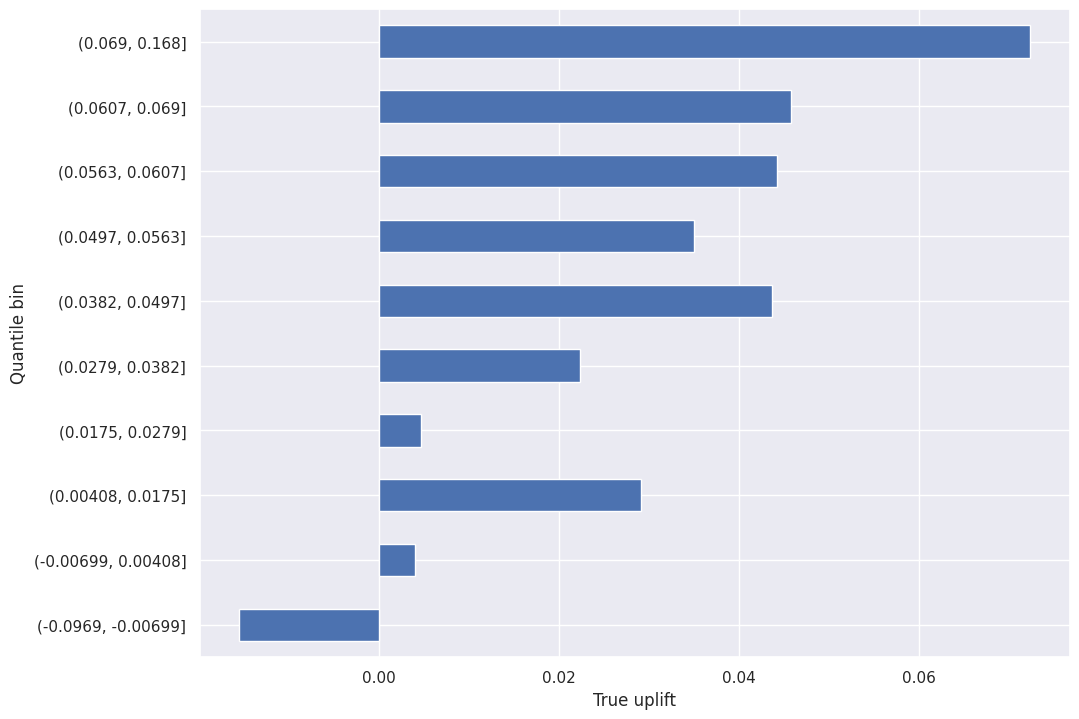

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
true_uplift_result.plot.barh()
plt.xlabel('True uplift');

The uplift quantile chart shows that, for the most part, true uplift increases from lower score bins to higher ones, which is what we’d expect to see if the model is working. So it appears our model can effectively segment out customers who more readily respond to treatment.

## Model Interpretation

Feature Importance (Gain, Permutation, etc)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

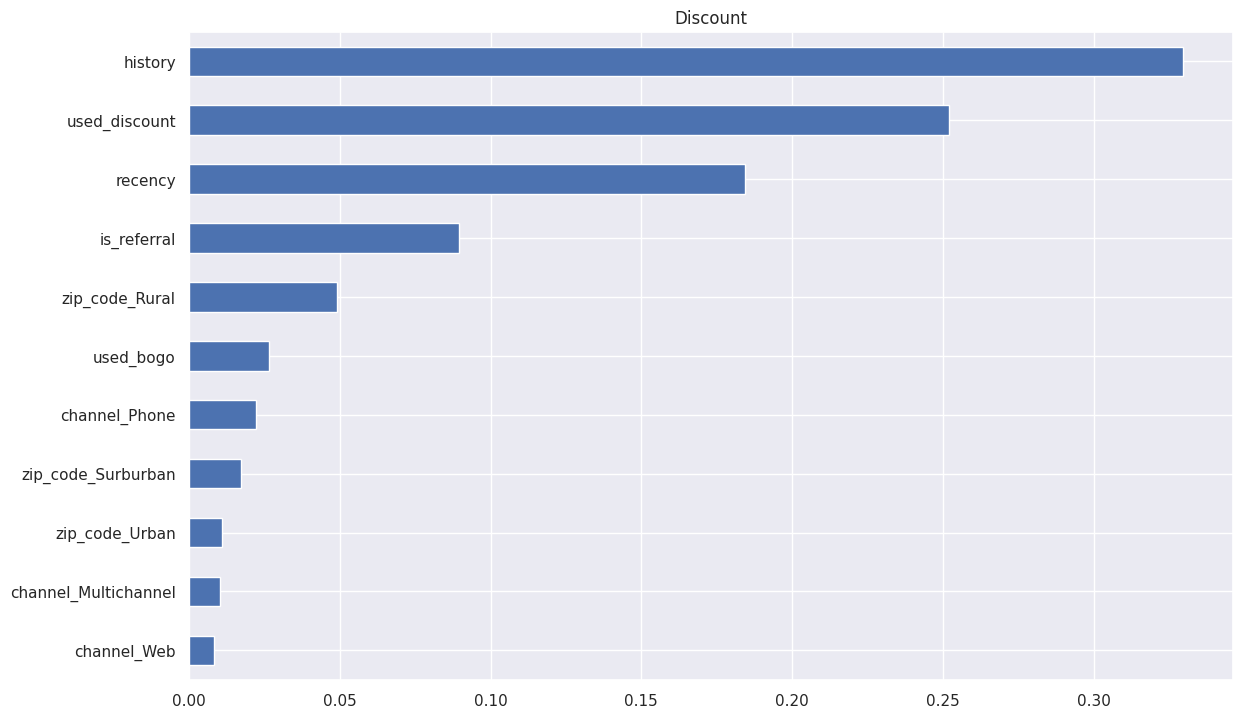

In [ ]:
slearner.plot_importance(X=X_test[x_col],
                        tau=X_test['s_learner_tau'],
                        method='auto',
                        random_state = 42,
                        features=x_col)

Shapley Dependence Model

**Shap Value for History**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

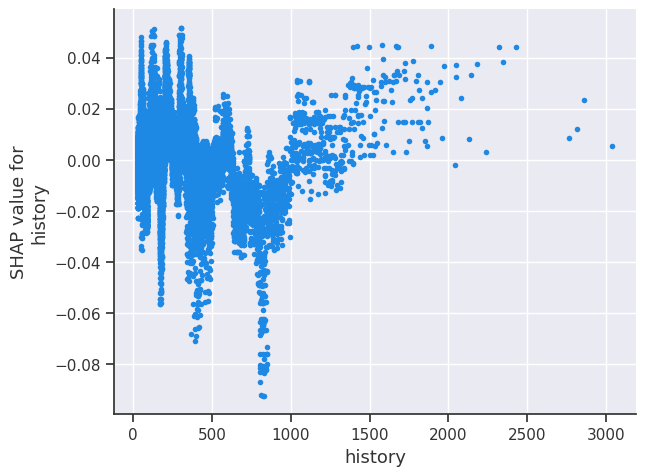

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='history',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for used_discount**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

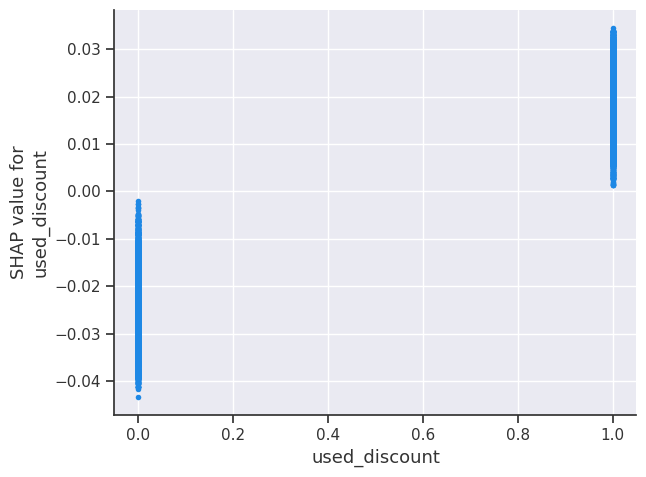

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='used_discount',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for Recency**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

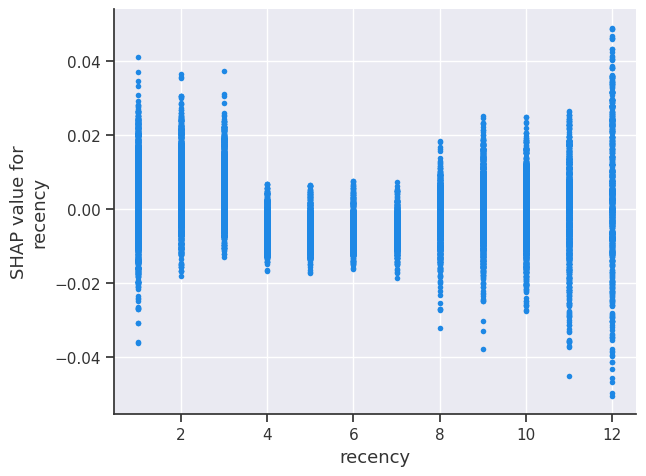

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='recency',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for zip_code_Rural**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

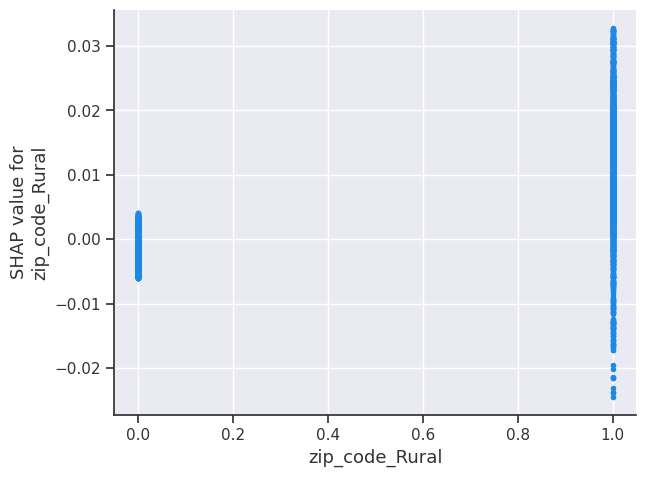

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='zip_code_Rural',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

**Shap Value for used_bogo**

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

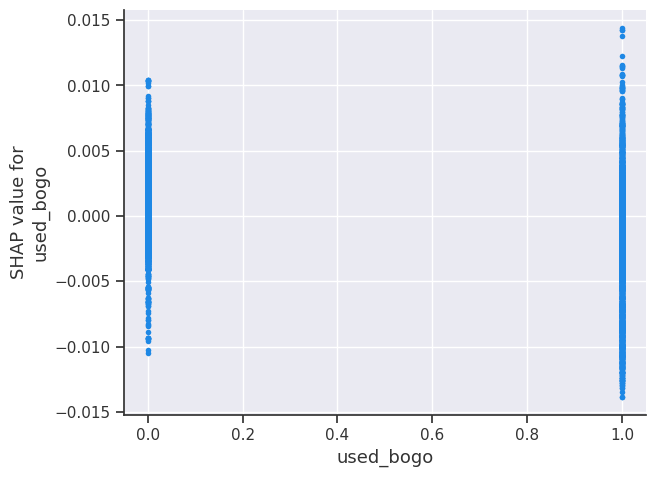

In [ ]:
slearner.plot_shap_dependence(
    treatment_group=treatment_category,
    feature_idx='used_bogo',
    X=X_test[x_col].values,
    features = x_col,
    tau= X_test['s_learner_tau'],
    interaction_idx=None
)

# Special Explanation Method for Tree-Based Model

Feature Importance

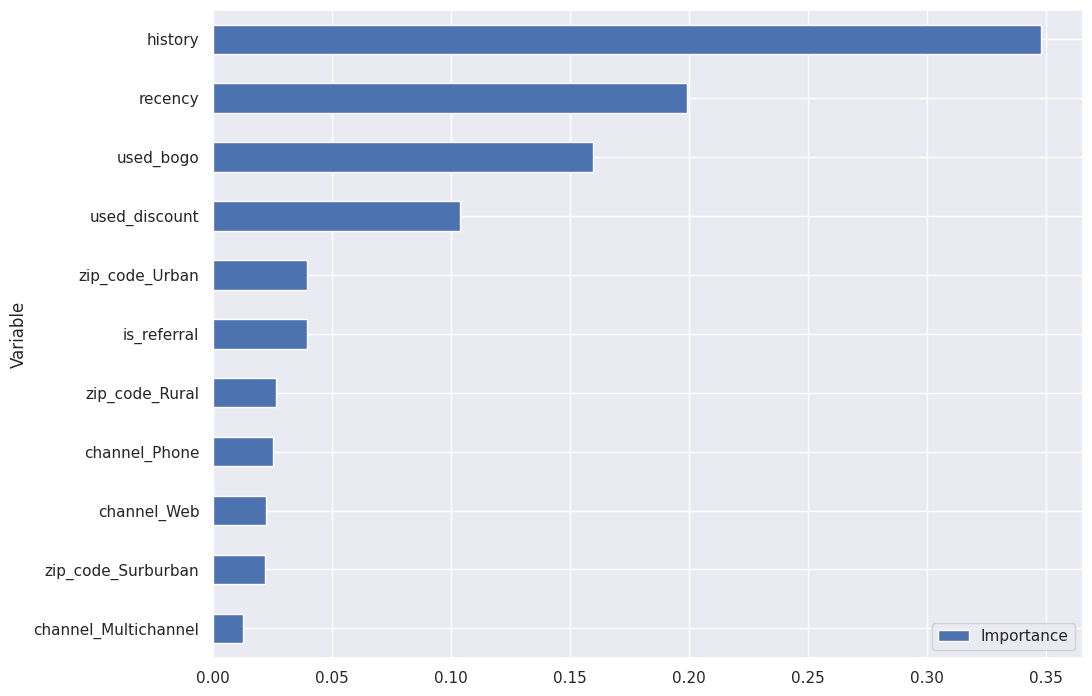

In [ ]:
pd.DataFrame(
    {
        "Variable": x_col,
        "Importance": uplift_model.feature_importances_
    }
).sort_values(by="Importance", ascending = True).plot(x = 'Variable', y = 'Importance', kind = 'barh');